tidy_data

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
import pandas as pd
import numpy as np
import env

DB_URL = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/tidy_data'

In [113]:
df = pd.read_sql('SELECT * FROM attendance', DB_URL)
df

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


### Attendance Data

Read the data from the attendance table and 
calculate an attendance percentage for each student. 
One half day is worth 50% of a full day, 
and 10 tardies is equal to one absence.


You should end up with something like this:
name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: grade, dtype: float64

In [114]:
df.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [119]:
df = df.rename(columns = {'Unnamed: 0' : 'student'})

In [120]:
tidy_df = df.melt(id_vars = 'student', var_name = 'day', value_name = 'grade')
tidy_df

,student,day,grade
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T
5,Jane,2018-01-02,P
6,Billy,2018-01-02,T
7,John,2018-01-02,T
8,Sally,2018-01-03,T
9,Jane,2018-01-03,T


In [121]:
tidy_df['grade'] = tidy_df.grade.map({'A': 0.0, 'T': 0.9, 'H': 0.5, 'P' : 1.0})
tidy_df.head()

,student,day,grade
0,Sally,2018-01-01,1.0
1,Jane,2018-01-01,0.0
2,Billy,2018-01-01,0.0
3,John,2018-01-01,1.0
4,Sally,2018-01-02,0.9


In [122]:
tidy_df.pivot_table(index = ['student'], values = 'grade')

,grade
student,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


In [125]:
tidy_df.groupby('student').mean()

,grade
student,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


### Coffee Levels

Read the coffee_levels table.
Transform the data so that each carafe is in it's own column.

In [132]:
df = pd.read_sql('SELECT * FROM coffee_levels', DB_URL)
df.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


In [133]:
df = df.pivot_table(index = ['hour'], values = 'coffee_amount', columns=['coffee_carafe'])
df.head()


coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947


Is this the best shape for the data?

It depends what question we are wanting to answer. If we are wanting to see the amount of coffee per hour in each carafe, then this would be a good way to view the data. 

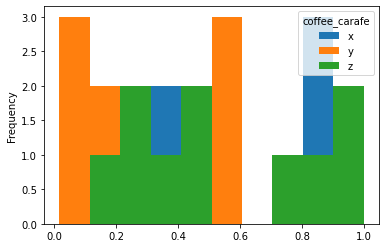

In [137]:
df.plot.hist()
plt.show()

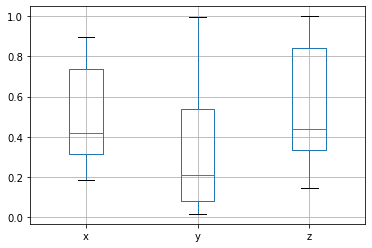

In [138]:
df.boxplot()
plt.show()

Read the cake_recipes table. 
This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

Tidy the data as necessary.

In [139]:
df = pd.read_sql('SELECT * FROM cake_recipes', DB_URL)
df.head()

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084


In [140]:
df[['recipe' ,'position']] = df['recipe:position'].str.split(':', expand = True)
df.head()

,recipe:position,225,250,275,300,recipe,position
0,a:bottom,61.738655,53.912627,74.414730,98.786784,a,bottom
1,a:top,51.709751,52.009735,68.576858,50.228470,a,top
2,b:bottom,57.095320,61.904369,61.196980,99.248541,b,bottom
3,b:top,82.455004,95.224151,98.594881,58.169349,b,top
4,c:bottom,96.470207,52.001358,92.893227,65.473084,c,bottom


In [141]:
df = df.drop(columns='recipe:position')
df.head()

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom


In [142]:
tidy_df = df.melt(id_vars=['recipe', 'position'])
tidy_df.head()

,recipe,position,variable,value
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


Which recipe, on average, is the best? recipe b

In [93]:
tidy_df.groupby(by = 'recipe').mean()

,value
recipe,
a,63.922201
b,76.736074
c,75.874748
d,62.864844


Which oven temperature, on average, produces the best results? 275

In [94]:
tidy_df.groupby(by = 'variable').mean()

,value
variable,
225,71.306022
250,66.577437
275,74.886754
300,66.627655


Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [99]:
tidy_df.sort_values(['value']).tail(1)

,recipe,position,variable,value
26,b,bottom,300,99.248541


Bonus: explore the other tables in the tidy_data database and reshape them as necessary so that they are in a tidy format.